In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

infile = "../img/functionRuntimesIoT.pkl"
outfile = "../img/2023_iot_functionDurations.pdf"

print("Setup done.")

Setup done.


In [2]:
sns.set_context("paper")
colors = sns.color_palette("Greys", 5)
#sns.set_palette(colors)
sns.set_style("whitegrid")
print("sns initialized.")

sns initialized.


In [3]:
df_calls = pd.read_pickle(infile)

In [4]:
rename = [
    ["aws","AWS"],
    ["azure","Azure"],
    ["google","GCP"],
]

for tuple in rename:
    print(f"old:{tuple[0]}, new:{tuple[1]}")
    df_calls.replace(to_replace=tuple[0],value=tuple[1],inplace=True)

df_calls.head(10)

old:aws, new:AWS
old:azure, new:Azure
old:google, new:GCP


,platform,setup,kind,value,valuec
0,AWS,split,a_database,29.822748,29.822748
1,AWS,split,b_compute,803.999568,833.822316
2,AWS,split,c_network,1167.853799,2001.676115
3,AWS,edge,a_database,129.548569,129.548569
4,AWS,edge,b_compute,683.502047,813.050615
5,AWS,edge,c_network,1082.933200,1895.983815
6,Azure,split,a_database,27.680618,27.680618
7,Azure,split,b_compute,711.437090,739.117707
8,Azure,split,c_network,1249.620576,1988.738284
9,Azure,edge,a_database,154.626257,154.626257


i is 0
g is ('a_database',    platform  setup        kind       value      valuec
0       AWS  split  a_database   29.822748   29.822748
3       AWS   edge  a_database  129.548569  129.548569
6     Azure  split  a_database   27.680618   27.680618
9     Azure   edge  a_database  154.626257  154.626257
12      GCP  split  a_database  103.362497  103.362497
15      GCP   edge  a_database  190.524380  190.524380)
color is (0.9125259515570934, 0.9125259515570934, 0.9125259515570934)
col is 1
col is 2
i is 6
i is 1
g is ('b_compute',    platform  setup       kind       value      valuec
1       AWS  split  b_compute  803.999568  833.822316
4       AWS   edge  b_compute  683.502047  813.050615
7     Azure  split  b_compute  711.437090  739.117707
10    Azure   edge  b_compute  656.711051  811.337308
13      GCP  split  b_compute  750.559007  853.921504
16      GCP   edge  b_compute  668.596159  859.120539)
color is (0.7777777777777778, 0.7777777777777778, 0.7777777777777778)
col is 1
col is 2

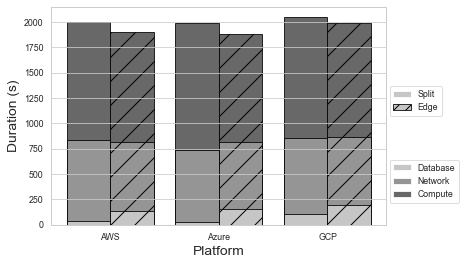

In [5]:
fig = plt.figure()
for i, g in enumerate(df_calls.groupby("kind")):
    print("i is " + str(i))
    print("g is " + str(g))
    print("color is " + str(colors[i]))
    ax = sns.barplot(data=g[1],
                     x="platform",
                     y="valuec",
                     hue="setup",
                     color=colors[i],
                     zorder=-i, # so first bars stay on top
                     edgecolor="k")

    i = 0
    col = 0
    coloridx = 1
    hatch = False
    for bars in ax.containers:
        for bar in bars:
            if col == 1 or col == 3 or col == 5:
                bar.set_hatch("/")

            if (i >= 6 ):
                coloridx = 2
            if (i >= 12):
                coloridx = 3

            bar.set_facecolor(colors[coloridx])
            i = i+1;
        col = col +1
        print("col is " + str(col))



    print("i is " + str (i))

ax.legend_.remove() # remove the redundant legends


rects=[]
rects.append(ax.bar(0, 0, color=colors[1]))
rects.append(ax.bar(0, 0, color=colors[2]))
rects.append(ax.bar(0, 0, color=colors[3]))
l1 = plt.legend(rects, ["Database", "Network", "Compute"], loc=[1.01, 0.1])


rects=[]
rects.append(ax.bar(0, 0, color=colors[1]))
rects.append(ax.bar(0, 0, color=colors[1], edgecolor="black", hatch = "//"))
l2 = plt.legend(rects, ["Split", "Edge"], loc=[1.01, 0.5])
ax.add_artist(l1)

ax.set_xlabel("Platform", fontsize="x-large")
ax.set_ylabel("Duration (s)", fontsize="x-large")
fig.savefig(outfile, bbox_inches="tight")
